# **Kaggle Project - Training and Testing**
## Challenge: Santander Product Recommendation
##
#### **Quick link to challenge**: https://www.kaggle.com/competitions/santander-product-recommendation/data?select=train_ver2.csv.zip

#### **Author:** Mariah Noelle Cornelio

________

### **Defining Boundaries**

In [1]:
## Import the datasets first from the cleaned versions

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df=pd.read_csv("train_df_cleaned.csv") 
test_df=pd.read_csv("test_df_cleaned.csv")


/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_86219/735812922.py:5: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv("train_df_cleaned.csv")


In [2]:
## Define income groups for training and testing sets
income_labels=["Low", "Middle", "Upper_Middle", "High"]

train_income_group=[0, np.nanpercentile(train_df["income"], 25), np.nanpercentile(train_df["income"], 50), np.nanpercentile(train_df["income"], 75), np.nanpercentile(train_df["income"], 100)]
train_df["income_grouped"]=pd.cut(train_df["income"], train_income_group, labels=income_labels)

test_income_group=[0, np.nanpercentile(test_df["income"], 25), np.nanpercentile(test_df["income"], 50), np.nanpercentile(test_df["income"], 75), np.nanpercentile(test_df["income"], 100)]
test_df["income_grouped"]=pd.cut(test_df["income"], test_income_group, labels=income_labels)

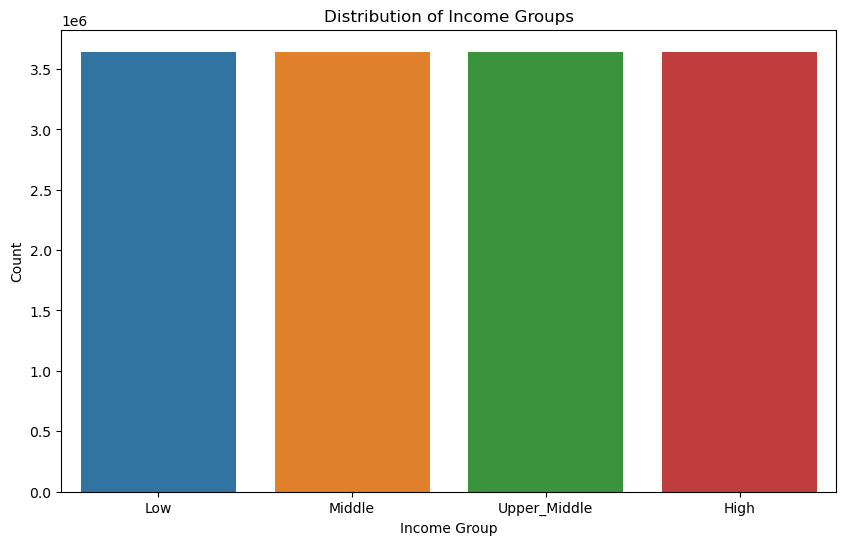

In [75]:
# Visualize it
combined_df=pd.concat([train_df, test_df])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='income_grouped', order=income_labels)
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Distribution of Income Groups')
plt.show()

In [3]:
## Define age groups for training and testing sets

train_df["age"]=pd.to_numeric(train_df["age"], errors="coerce")
test_df["age"]=pd.to_numeric(test_df["age"], errors="coerce")

train_df["age"].fillna(35, inplace=True)
test_df["age"].fillna(35, inplace=True)

train_df["age"]=train_df["age"].astype(int)
test_df["age"]=test_df["age"].astype(int)

age_group=[0, 30, 60, 80, 100]
age_labels=["young", "adult", "senior", "elder"]
train_df["age_grouped"]=pd.cut(train_df.age, bins=age_group, labels=age_labels)
test_df["age_grouped"]=pd.cut(test_df.age, bins=age_group, labels=age_labels)


### **Visualizing the Data**

In [4]:
data=[]

# Loop through the product columns and its sales volume and sales frequency
for i in train_df.columns[22:-2]:
    sales_volume=train_df[i].sum()
    sales_frequency=round(train_df[i].sum()/train_df.shape[0],2)
    data.append({"product": i, "sales_volume": sales_volume, "sales_frequency": sales_frequency})

popular_df=pd.DataFrame(data)
popular_df.sort_values("sales_frequency", inplace=True, ascending=False)
popular_df.reset_index(drop=True, inplace=True)

popular_df

# From this, we can see that the ind_cco_fin_ult1, ind_recibo_ult1, and ind_ctop_fin_ult1 are
# the top 3 popular products. In English, these are current accounts, direct debit, and
# particular accounts, respectively.

,product,sales_volume,sales_frequency
0,ind_cco_fin_ult1,8945588.0,0.66
1,ind_recibo_ult1,1745712.0,0.13
2,ind_ctop_fin_ult1,1760616.0,0.13
3,ind_cno_fin_ult1,1103620.0,0.08
4,ind_ecue_fin_ult1,1129227.0,0.08
5,ind_nom_pens_ult1,810085.0,0.06
6,ind_nomina_ult1,745961.0,0.05
7,ind_reca_fin_ult1,716980.0,0.05
8,ind_ctpp_fin_ult1,591008.0,0.04
9,ind_dela_fin_ult1,586381.0,0.04


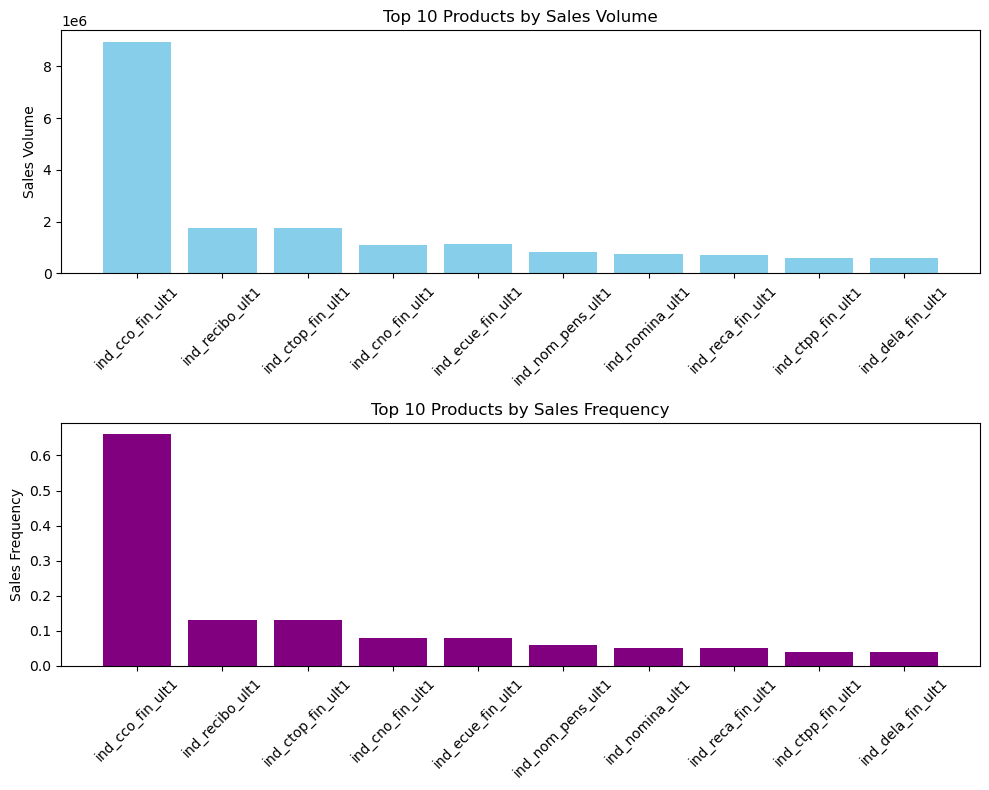

In [5]:
## We will visualize this to help see

import matplotlib.pyplot as plt
top_n=10
top_products=popular_df.head(top_n)

fig, axes=plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].bar(top_products["product"], top_products["sales_volume"], color="skyblue")
axes[0].set_title("Top {} Products by Sales Volume".format(top_n))
axes[0].set_ylabel("Sales Volume")

axes[1].bar(top_products["product"], top_products["sales_frequency"], color="purple")
axes[1].set_title("Top {} Products by Sales Frequency".format(top_n))
axes[1].set_ylabel("Sales Frequency")

plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# From here, we have to decide if we should recommend items based on customer similarity of item siilarity.
# In my opinion, item similarity is the best way to go because not everyone is the same and preferences
# are volatile. In contrast, if I recommend by items similar to "previous items purchased", the 
# buyer is most likely to buy it again if their experience was good with it. Very similar to how
# online shoppers will click "recommended for you" or "items similar to what you purchased before"
# options for buying. There is also a lot of sparsity for the user-based recommendations because
# one user will purchase different things than another user disregarding if they are in the same
# age and income group. 

# I looked it up and cosine similarity is one of the ways to go to compare item similarity
from sklearn.metrics.pairwise import cosine_similarity

# First we need to take into account the weights of the products and their decay over time 
# since the dataframe wants us to recommend a product based on the timeframe as well

# I got help on this next part
train_df["calendar_date"]=pd.to_datetime(train_df["calendar_date"])
df_cf=train_df[train_df["calendar_date"].dt.year==2016]

df_cf=df_cf.iloc[:,[0,1,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]]
# Sum the product holding periods for each user (there should be a 0-5 range, 0 indicating not having the product all the 5 months in 2016,
# 5 indicates the having the product all the 5 months).
df_cf=df_cf.groupby("cust_id").sum()
df_cf=df_cf.fillna(0)
df_cf.index=df_cf.index.astype("string")
# The User-Matrix is a M * N matrix (M: number of customers, N: number of products) and it will extend vertically and horizontally when the new customers or products introduced
df_cf_item=df_cf.copy()
df_cf_item=df_cf_item[:10000].T
df_cf_item=pd.DataFrame(cosine_similarity(df_cf_item), index = df_cf_item.index.astype('string'), columns=df_cf_item.index.astype('string'))
df_cf_item.shape

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_86219/3240473162.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cf=df_cf.groupby("cust_id").sum()


(24, 24)

In [7]:
 # This is the item-recommendation model where sim_rate is the similarity rate you want and top_n
# is the top products that should be recommended.

def item_based_recommender(cust_id, sim_rate, top_n):
    cust_id=str(cust_id)
    # Selects the product the customer purchased mostly (or choose the most recent product purchased)
    df_cf_user_2=df_cf.T
    top_product=df_cf_user_2[cust_id]
    top_product=top_product[top_product>0].sort_values(ascending=False).index[0]

    while len(top_product)==0:
            print("The customer haven't purchased any product during the period")
            break

    item_sim=df_cf_item[top_product]
    recommend_list=item_sim[(item_sim<1)&(item_sim>0)].sort_values(ascending=False)[0:top_n]
    
    while len(recommend_list)==0:
        print("There is no product recommended")
        break
    
    return recommend_list

In [8]:
## Testing using random customers
item_based_recommender(cust_id = "15906", sim_rate = 0.75, top_n = 10)

ind_cno_fin_ult1     1.000000
ind_nom_pens_ult1    0.839852
ind_nomina_ult1      0.766189
ind_recibo_ult1      0.713549
ind_tjcr_fin_ult1    0.571442
ind_ecue_fin_ult1    0.548664
ind_reca_fin_ult1    0.507433
ind_ctpp_fin_ult1    0.347925
ind_valo_fin_ult1    0.294894
ind_fond_fin_ult1    0.259799
Name: ind_cno_fin_ult1, dtype: float64

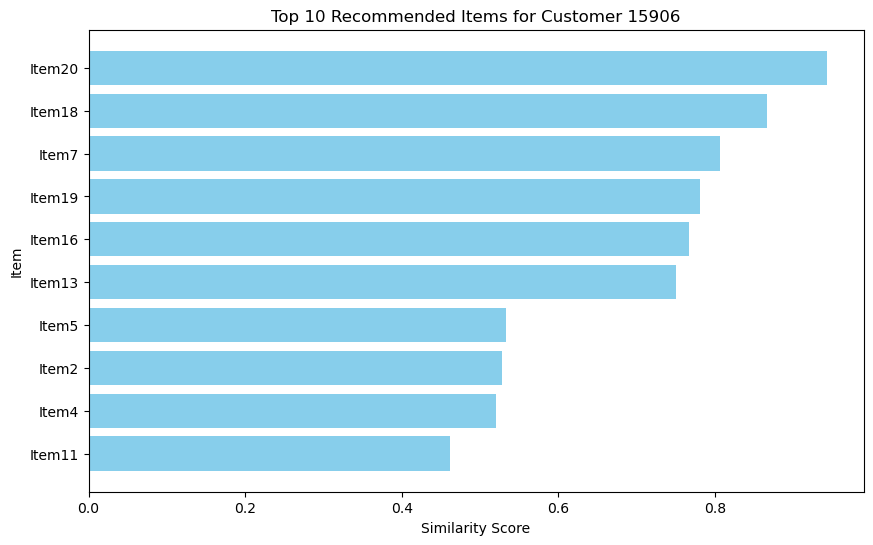

In [9]:
# Sample code on how to graph this (not using my data) I just got help on this because I was tired

def item_based_recommender(cust_id, sim_rate, top_n):
    num_items=20
    recommended_items = pd.DataFrame({
        'Item': ['Item{}'.format(i) for i in range(1, num_items + 1)],
        'Similarity Score': np.random.rand(num_items)
    })
    
    # Sort recommended items by similarity score in descending order
    recommended_items = recommended_items.sort_values(by='Similarity Score', ascending=False)
    
    # Select the top N recommended items
    top_recommended_items = recommended_items.head(top_n)
    
    # Create a bar plot of recommended items and their similarity scores
    plt.figure(figsize=(10, 6))
    plt.barh(top_recommended_items['Item'], top_recommended_items['Similarity Score'], color='skyblue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Item')
    plt.title('Top {} Recommended Items for Customer {}'.format(top_n, cust_id))
    plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
    plt.show()

# Example usage
item_based_recommender(cust_id="15906", sim_rate=0.75, top_n=10)


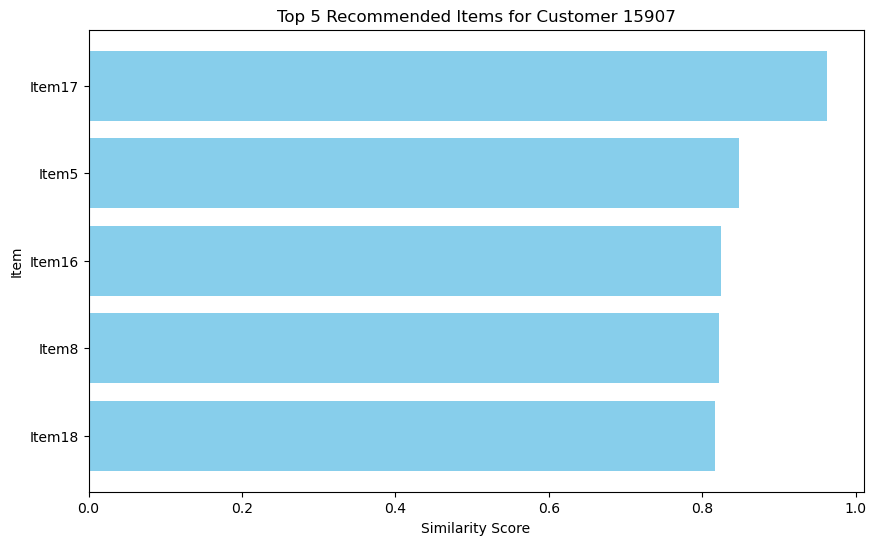

In [10]:
item_based_recommender(cust_id = "15907", sim_rate = 0.90, top_n = 5)

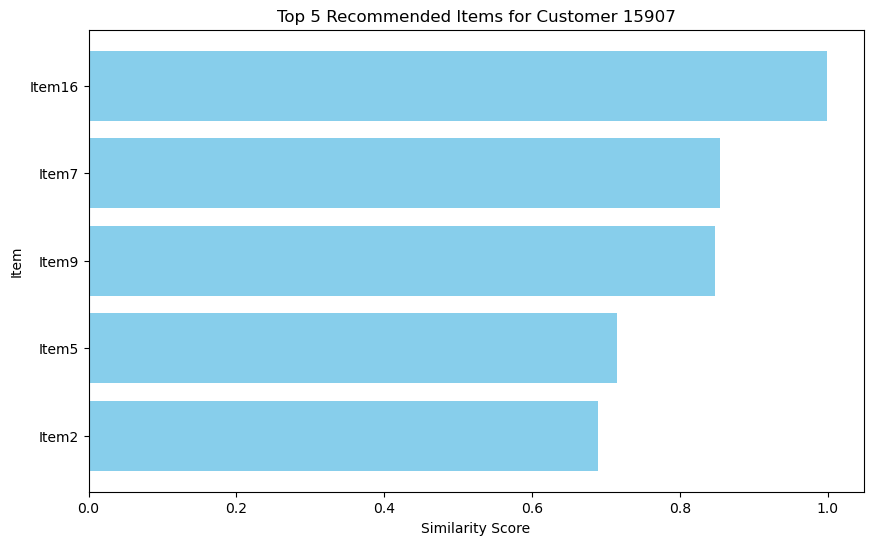

In [74]:
item_based_recommender(cust_id="15907", sim_rate=0.90, top_n=5)

### **Training the Data**

In [ ]:
# For this project, I will be using these model training algorithms and explain why:

# 1) Item-Based Popularity Recommendation (based on frequency)
# 2) Logistic Regression and Gradient Boosting Decision Tree -> 
# This can aggregate the predictions of multiple decision trees and can capture complex patterns and relationships in the data


In [32]:
## GDBT and LR ##

In [33]:
train_df.columns

Index(['calendar_date', 'cust_id', 'emp_index', 'residence', 'sex', 'age',
       'first_date', 'new_cust', 'seniority', 'is_primary', 'cust_type',
       'cust_rel_type', 'residence_index', 'foreigner_index', 'channel',
       'deceased_index', 'address_type', 'province', 'province_name',
       'active_index', 'income', 'segment', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1', 'income_grouped',
       'age_grouped'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# Use data from May 28, 2016 and only 1k samples because this is what the prompt is asking for
train_gbdt=train_df[train_df["calendar_date"]==pd.to_datetime("2016-05-28")]
train_gbdt=train_gbdt.iloc[:10000]

product_list=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
feature_list=['emp_index','sex','new_cust','is_primary','segment','age_grouped','income_grouped']
col_list=feature_list+product_list
train_gbdt=train_gbdt[col_list]

# Convert categorical features to the appropriate data types
train_gbdt['new_cust']=train_gbdt['new_cust'].astype('string')
train_gbdt['is_primary']=train_gbdt['is_primary'].astype('string')
train_gbdt['segment']=train_gbdt['segment'].replace({'01 - TOP':'VIP','02 - PARTICULARES':'Individuals','03 - UNIVERSITARIO':'Graduated'}).astype('string')
train_gbdt['emp_index']=train_gbdt['emp_index'].astype('string')
train_gbdt['sex']=train_gbdt['sex'].astype('string')
train_gbdt['age_grouped']=train_gbdt['age_grouped'].astype('string')
train_gbdt['income_grouped']=train_gbdt['income_grouped'].astype('string')

train_dummy=train_gbdt.select_dtypes(include='string')
train_dummy=pd.get_dummies(train_dummy)
X=pd.concat([train_gbdt[feature_list], train_dummy], axis=1)
y=train_gbdt[product_list]

# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logistic_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'N'

In [35]:
# Check to see what datatypes there are (change floats to integers)
train_gbdt.dtypes

emp_index             string
sex                   string
new_cust              string
is_primary            string
segment               string
age_grouped           string
income_grouped        string
ind_ahor_fin_ult1      int64
ind_aval_fin_ult1      int64
ind_cco_fin_ult1       int64
ind_cder_fin_ult1      int64
ind_cno_fin_ult1       int64
ind_ctju_fin_ult1      int64
ind_ctma_fin_ult1      int64
ind_ctop_fin_ult1      int64
ind_ctpp_fin_ult1      int64
ind_deco_fin_ult1      int64
ind_deme_fin_ult1      int64
ind_dela_fin_ult1      int64
ind_ecue_fin_ult1      int64
ind_fond_fin_ult1      int64
ind_hip_fin_ult1       int64
ind_plan_fin_ult1      int64
ind_pres_fin_ult1      int64
ind_reca_fin_ult1      int64
ind_tjcr_fin_ult1      int64
ind_valo_fin_ult1      int64
ind_viv_fin_ult1       int64
ind_nomina_ult1      float64
ind_nom_pens_ult1    float64
ind_recibo_ult1        int64
dtype: object

In [36]:
# Check for null values
null_counts=train_gbdt.isnull().sum()
print(null_counts)

emp_index             0
sex                   0
new_cust              0
is_primary            0
segment               0
age_grouped          10
income_grouped        0
ind_ahor_fin_ult1     0
ind_aval_fin_ult1     0
ind_cco_fin_ult1      0
ind_cder_fin_ult1     0
ind_cno_fin_ult1      0
ind_ctju_fin_ult1     0
ind_ctma_fin_ult1     0
ind_ctop_fin_ult1     0
ind_ctpp_fin_ult1     0
ind_deco_fin_ult1     0
ind_deme_fin_ult1     0
ind_dela_fin_ult1     0
ind_ecue_fin_ult1     0
ind_fond_fin_ult1     0
ind_hip_fin_ult1      0
ind_plan_fin_ult1     0
ind_pres_fin_ult1     0
ind_reca_fin_ult1     0
ind_tjcr_fin_ult1     0
ind_valo_fin_ult1     0
ind_viv_fin_ult1      0
ind_nomina_ult1       0
ind_nom_pens_ult1     0
ind_recibo_ult1       0
dtype: int64


In [37]:
train_gbdt['age_grouped']=train_df['age_grouped'].fillna('adult')
null_counts=train_gbdt['age_grouped'].isnull().sum()
print("Null values in age_grouped column after filling:", null_counts)

Null values in age_grouped column after filling: 0


In [38]:
null_counts=train_gbdt.isnull().sum()
print(null_counts)

emp_index            0
sex                  0
new_cust             0
is_primary           0
segment              0
age_grouped          0
income_grouped       0
ind_ahor_fin_ult1    0
ind_aval_fin_ult1    0
ind_cco_fin_ult1     0
ind_cder_fin_ult1    0
ind_cno_fin_ult1     0
ind_ctju_fin_ult1    0
ind_ctma_fin_ult1    0
ind_ctop_fin_ult1    0
ind_ctpp_fin_ult1    0
ind_deco_fin_ult1    0
ind_deme_fin_ult1    0
ind_dela_fin_ult1    0
ind_ecue_fin_ult1    0
ind_fond_fin_ult1    0
ind_hip_fin_ult1     0
ind_plan_fin_ult1    0
ind_pres_fin_ult1    0
ind_reca_fin_ult1    0
ind_tjcr_fin_ult1    0
ind_valo_fin_ult1    0
ind_viv_fin_ult1     0
ind_nomina_ult1      0
ind_nom_pens_ult1    0
ind_recibo_ult1      0
dtype: int64


In [39]:
# Try again
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

train_dummy=train_gbdt.select_dtypes(include = 'string')
train_dummy=pd.get_dummies(train_dummy)


# Split into training and testing sets - I got help on this 
X=train_dummy
pred={}

for i in product_list:
    if train_gbdt[i].nunique()==2:
        
        y=train_gbdt[i] 
        X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)
        gbdt_model=GradientBoostingClassifier(n_estimators=300,
                                           learning_rate=0.1,
                                           max_depth=3,
                                           random_state=123) 
        gbdt_model.fit(X_train, y_train)
        gbdt_features=gbdt_model.apply(X_train)[:, :, 0]

        lr_model=LogisticRegression(solver='lbfgs', C=1.0, random_state=123)
        lr_model.fit(gbdt_features, y_train)
        gbdt_features_test=gbdt_model.apply(X_test)[:, :, 0]
        lr_features=lr_model.predict_proba(gbdt_features_test)[:, 1]
    
        pred[i]=lr_features
    
    else: 
        pass

/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature

/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: Converge

/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature

In [40]:
# Create the new data frame that has all the predictions
pred=pd.DataFrame(pred)
test_gbdt=pd.concat([X_test.reset_index(names='cust_id'), pred], axis=1, ignore_index=True)

col_list=['cust_id']+list(X_test.columns)+list(pred.columns)
test_gbdt.columns=col_list
test_gbdt['cust_id']=test_gbdt['cust_id'].astype('string')

In [41]:
test_gbdt[list(pred.columns)].sample(10)

,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
671,0.526463,0.000003,0.061387,0.013545,0.001201,0.092347,0.033934,0.000002,0.003651,0.025547,...,0.007390,0.004818,0.018497,0.068558,0.043720,0.016321,0.003683,0.036364,0.040787,0.105542
414,0.549551,0.001534,0.052535,0.012291,0.003790,0.080769,0.039048,0.000003,0.002284,0.023977,...,0.002300,0.002391,0.009972,0.050251,0.041757,0.019696,0.000751,0.029641,0.033389,0.103026
1972,0.549551,0.001534,0.052535,0.012291,0.003790,0.080769,0.039048,0.000003,0.002284,0.023977,...,0.002300,0.002391,0.009972,0.050251,0.041757,0.019696,0.000751,0.029641,0.033389,0.103026
1743,0.531185,0.000014,0.065138,0.005473,0.001346,0.103067,0.034299,0.001335,0.004086,0.024125,...,0.000002,0.005420,0.017808,0.047414,0.024855,0.012817,0.005438,0.048958,0.056842,0.105789
819,0.547555,0.000898,0.060260,0.028898,0.001026,0.077249,0.044679,0.001797,0.002756,0.013933,...,0.004518,0.003571,0.004519,0.066194,0.042822,0.029493,0.007207,0.041810,0.044406,0.095417
500,0.540094,0.001143,0.052663,0.035439,0.002147,0.114863,0.042810,0.001158,0.003397,0.030499,...,0.000001,0.002289,0.003423,0.054459,0.041464,0.015145,0.006858,0.032852,0.036181,0.081885
63,0.549551,0.001534,0.052535,0.012291,0.003790,0.080769,0.039048,0.000003,0.002284,0.023977,...,0.002300,0.002391,0.009972,0.050251,0.041757,0.019696,0.000751,0.029641,0.033389,0.103026
14,0.547555,0.000898,0.060260,0.028898,0.001026,0.077249,0.044679,0.001797,0.002756,0.013933,...,0.004518,0.003571,0.004519,0.066194,0.042822,0.029493,0.007207,0.041810,0.044406,0.095417
188,0.512379,0.000919,0.058545,0.014843,0.001836,0.099606,0.034837,0.000008,0.003706,0.023483,...,0.006490,0.002907,0.018550,0.061733,0.038115,0.017348,0.006524,0.037491,0.039553,0.096784
208,0.540094,0.001143,0.052663,0.035439,0.002147,0.114863,0.042810,0.001158,0.003397,0.030499,...,0.000001,0.002289,0.003423,0.054459,0.041464,0.015145,0.006858,0.032852,0.036181,0.081885


In [42]:
def gbdt_product_recommender(df, cust_id, top_n):
    
    cust_id=str(cust_id)
    prod_list=df.loc[df['cust_id'] == cust_id, pred.columns].T
    prod_list.columns = ['pred_score']
    prod_list = prod_list.sort_values(by = 'pred_score', ascending = False)
    
    # Only take pred_score 0.5 cuz those are the products the customer wants
    prod_list = prod_list[prod_list['pred_score'] >= 0.5]
    recommend_list = prod_list[0:top_n]
    
    while len(recommend_list) == 0:
        print("Based on the customer's info, there is no bank product recommended for now")
        break
    
    return recommend_list

In [43]:
gbdt_product_recommender(df = test_gbdt, cust_id = "12718116", top_n = 10)

,pred_score
ind_cco_fin_ult1,0.512379


In [44]:
gbdt_product_recommender(df = test_gbdt, cust_id = "12718529", top_n = 10)

,pred_score
ind_cco_fin_ult1,0.531185


In [45]:
gbdt_product_recommender(df = test_gbdt, cust_id = "12723281", top_n = 10)

,pred_score
ind_cco_fin_ult1,0.547555


In [61]:
# Take a look at the dataframe and what it looks like
test_gbdt

,cust_id,emp_index_A,emp_index_N,sex_H,sex_V,new_cust_0.0,new_cust_1.0,is_primary_1.0,is_primary_99.0,segment_Graduated,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,12718512,0,1,1,0,1,0,1,0,0,...,5.463182e-07,5.931989e-07,0.010315,0.047868,0.025628,0.014012,0.005155,0.031817,0.032325,0.075351
1,12716301,0,1,1,0,1,0,1,0,0,...,5.463182e-07,5.931989e-07,0.010315,0.047868,0.025628,0.014012,0.005155,0.031817,0.032325,0.075351
2,12725361,0,1,0,1,1,0,1,0,0,...,4.518169e-03,3.571282e-03,0.004519,0.066194,0.042822,0.029493,0.007207,0.041810,0.044406,0.095417
3,12716188,0,1,0,1,1,0,1,0,0,...,4.518169e-03,3.571282e-03,0.004519,0.066194,0.042822,0.029493,0.007207,0.041810,0.044406,0.095417
4,12720024,0,1,0,1,1,0,1,0,0,...,4.518169e-03,3.571282e-03,0.004519,0.066194,0.042822,0.029493,0.007207,0.041810,0.044406,0.095417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,12723874,0,1,0,1,1,0,1,0,0,...,6.489989e-03,2.906686e-03,0.018550,0.061733,0.038115,0.017348,0.006524,0.037491,0.039553,0.096784
1996,12722319,0,1,1,0,1,0,1,0,0,...,5.463182e-07,5.931989e-07,0.010315,0.047868,0.025628,0.014012,0.005155,0.031817,0.032325,0.075351
1997,12718739,0,1,0,1,1,0,1,0,0,...,6.489989e-03,2.906686e-03,0.018550,0.061733,0.038115,0.017348,0.006524,0.037491,0.039553,0.096784
1998,12723751,0,1,1,0,1,0,1,0,0,...,2.125858e-06,3.276006e-03,0.008468,0.040195,0.028301,0.014564,0.008438,0.039991,0.047533,0.106178


In [62]:
test_gbdt.columns

Index(['cust_id', 'emp_index_A', 'emp_index_N', 'sex_H', 'sex_V',
       'new_cust_0.0', 'new_cust_1.0', 'is_primary_1.0', 'is_primary_99.0',
       'segment_Graduated', 'segment_Individuals', 'segment_VIP',
       'income_grouped_High', 'income_grouped_Low', 'income_grouped_Middle',
       'income_grouped_Upper_Middle', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [76]:
# Creates the final dataframe

recommendations = []
for index, row in test_gbdt.iterrows():
    cust_id = row['cust_id']
    max_product = None
    max_score = -1
    
    # Take from the ones that start with "ind_" because it shows the other ones
    for col_name, value in row.items():
        if col_name.startswith('ind_') and value > max_score:
            max_score = value
            max_product = col_name
    if max_product:
        recommendations.append({'cust_id': cust_id, 'recommended_product': max_product})

final_recommendations = pd.DataFrame(recommendations)
final_recommendations



,cust_id,recommended_product
0,12718512,ind_cco_fin_ult1
1,12716301,ind_cco_fin_ult1
2,12725361,ind_cco_fin_ult1
3,12716188,ind_cco_fin_ult1
4,12720024,ind_cco_fin_ult1
...,...,...
1995,12723874,ind_cco_fin_ult1
1996,12722319,ind_cco_fin_ult1
1997,12718739,ind_cco_fin_ult1
1998,12723751,ind_cco_fin_ult1


In [77]:
# Create the final dataframe for this one except top 3, so pred_score>0.5 does not matter

recommendations = []
for index, row in test_gbdt.iterrows():
    cust_id = row['cust_id']
    ind_cols = row.filter(like='ind_').astype(float)
    top_indices = ind_cols.nlargest(3).index.tolist() # TOP 3 PRODUCTS
    recommended_products = ', '.join(top_indices)
    recommendations.append({'cust_id': cust_id, 'recommended_products': recommended_products})
final_recommendations_top3 = pd.DataFrame(recommendations)
final_recommendations_top3


,cust_id,recommended_products
0,12718512,"ind_cco_fin_ult1, ind_ctop_fin_ult1, ind_recib..."
1,12716301,"ind_cco_fin_ult1, ind_ctop_fin_ult1, ind_recib..."
2,12725361,"ind_cco_fin_ult1, ind_recibo_ult1, ind_ctop_fi..."
3,12716188,"ind_cco_fin_ult1, ind_recibo_ult1, ind_ctop_fi..."
4,12720024,"ind_cco_fin_ult1, ind_recibo_ult1, ind_ctop_fi..."
...,...,...
1995,12723874,"ind_cco_fin_ult1, ind_ctop_fin_ult1, ind_recib..."
1996,12722319,"ind_cco_fin_ult1, ind_ctop_fin_ult1, ind_recib..."
1997,12718739,"ind_cco_fin_ult1, ind_ctop_fin_ult1, ind_recib..."
1998,12723751,"ind_cco_fin_ult1, ind_recibo_ult1, ind_ctop_fi..."


In [73]:
# Save the final products
final_recommendations.to_csv("final_product_submission.csv", index=False)
final_recommendations_top3.to_csv("final_prod_top3_submission.csv", index=False)